In [1]:
import numpy as np

In [2]:
from skimage.measure import moments

In [3]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage import io
from skimage.util import img_as_float
import matplotlib.pyplot as plt

In [4]:
image = img_as_float(io.imread('../../../datasets/UCMerced_LandUse/Images/intersection/intersection10.tif'))

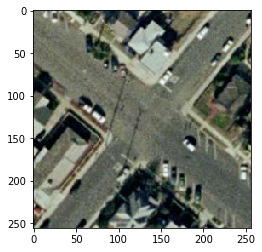

In [5]:
plt.imshow(image)

In [6]:
segments = slic(image, n_segments=169)

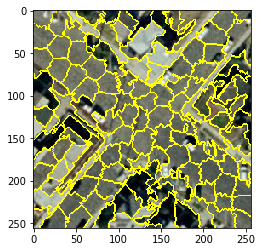

In [7]:
plt.imshow(mark_boundaries(image, segments))

### Calculo dos descritores de Fourier

In [8]:
contour = image[find_boundaries(segments==0)]

In [9]:
contour_cp = contour.mean(axis=1).reshape(1,101).copy()

In [12]:
contour_complex = contour_cp.view(dtype=[('width', np.complex64)]).astype(np.complex64)

In [13]:
degree=18

In [14]:
fourier_result = np.fft.fft(contour_complex).squeeze()

fourier_result = np.fft.fftshift(fourier_result)
center_index = int(len(fourier_result) / 2)
fourier_result = fourier_result[int(
    center_index - degree / 2):int(center_index + degree / 2)]
fourier_result = np.fft.ifftshift(fourier_result)

In [26]:
fourier_result.real.mean(), fourier_result.imag.mean(), fourier_result.real.astype(np.float128).std(), fourier_result.imag.astype(np.float128).std()

(1.5519112e+30,
 1.7854956e+30,
 4.4744049178842626725e+31,
 4.5207209687641540807e+31)

### Cálculo da área

In [70]:
moments(image[segments==0], 0) #area da imagem

array([[676.91372549]])

In [72]:
image[segments==0].shape

(449, 3)

In [73]:
449*3

1347

### Área convexa

In [34]:
from skimage.util import invert
from skimage.morphology import convex_hull_image

In [51]:
bw_img = image.copy()
bw_img[segments!=0] = 0
bw_img[segments==0] = 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


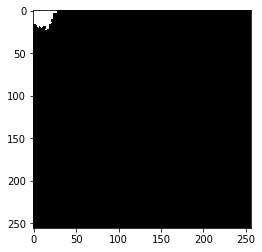

In [52]:
plt.imshow(bw_img)

In [66]:
chull = convex_hull_image(bw_img)
chull_img = chull.copy().astype(int)
chull_img[chull_img==0] = 255
chull_img[chull_img==1] = 0

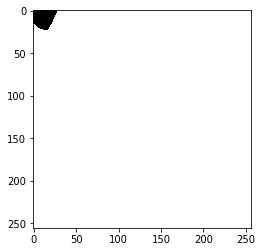

In [67]:
plt.imshow(chull_img)

In [75]:
moments(image[chull], 0)

array([749.6745098])